<a href="https://colab.research.google.com/github/ShinWalnut/ABR_basic/blob/master/Drive_Colab_%ED%8C%8C%EC%9D%BC_%EC%97%B0%EB%8F%99%EB%B0%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 글은 아래 링크된 네이버 블로그 게시물에 좀 더 자세히 작성되어 있습니다.

https://blog.naver.com/skyshin0304/221328089139

In [4]:
# 구글드라이브와 코랩 연동하여 드라이브의 파일 코랩에서 사용하는 방법

# Step 1. 구글 드라이브에 colab 파일 생성하기
  # 위 블로그 게시물 참고.
  
# Step 2. 내 구글계정과 colab 연동시키기 ---- colab ipynb 파일에서 (현재 코드창) 아래와 같이 입력.

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# 위 코드를 실행하면 링크가 나오고, 링크를 접속하면 구글 로그인 후 계정을 연동할 수 있게됩니다.
# 링크클릭 -> 로그인 -> 인증코드 붙여넣기 -> 링크클릭 -> 로그인 -> 인증코드 붙여넣기 이렇게 진행됩니다.

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Step 3. 구글 드라이브를 코랩에 마운트하기 ( 이 과정을 거쳐 드라이브의 폴더, 파일을 코랩에서 쓸 수 있게 됩니다.)
!mkdir -p drive
!google-drive-ocamlfuse drive

(<matplotlib.image.AxesImage at 0x7fa980329be0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

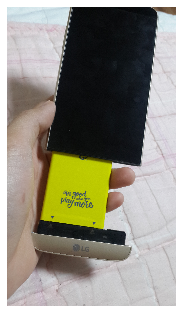

In [1]:
# Step 4. 드라이브의 파일 불러오기 예제

import cv2 as cv  # 이미지파일을 읽기위해 opencv 라이브러리를 가져옵니다. 
import numpy as np
from matplotlib import pyplot as plt  # 이미지 파일을 출력하기위해 pyplot을 불러옵니다.

img = cv.imread('drive/G5사진백업/20160405_184817.jpg') # 제 드라이브에 있는 파일입니다.
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # opencv에서는 BGR 방식으로 이미지를 읽고 plot은 RGB 방식으로 표현하므로 이미지를 바꿔줍니다.
plt.imshow(img),plt.xticks([]),plt.yticks([]) # 이미지 표시하기